# Clustering using KMeans algorithm

In [3]:
#importing necessary libraries

import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from pandas import DataFrame
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

#loading dataset into dataframe from excelsheet

DataDF = pd.read_excel('E:/MS/Thesis/data set/Dataset.xlsx')
print(DataDF.shape)
DataDF.head()

(30, 12)


,Battery,Collision,Headlights,Indicators,Remotecontrol,Sync,brakelights,rearlights,similIDE,Horn,Wiper,Document
0,66,79,80.333,137,103.333,26,84,84,149,0,0,URS1
1,66,102,0.000,0,131.000,0,0,0,0,58,0,URS2
2,66,72,78.000,142,0.000,26,0,0,65,58,0,URS3
3,66,78,78.000,142,0.000,26,0,0,65,0,0,URS4
4,0,0,88.000,132,142.000,0,84,84,233,0,19,URS5


In [6]:
# Checking for null values

DataDF.isnull().sum()

# Getting the columns we need

DataDF.columns

Index(['Battery', 'Collision', 'Headlights', 'Indicators', 'Remotecontrol',
       'Sync', 'brakelights', 'rearlights', 'similIDE', 'Horn', 'Wiper',
       'Document'],
      dtype='object')

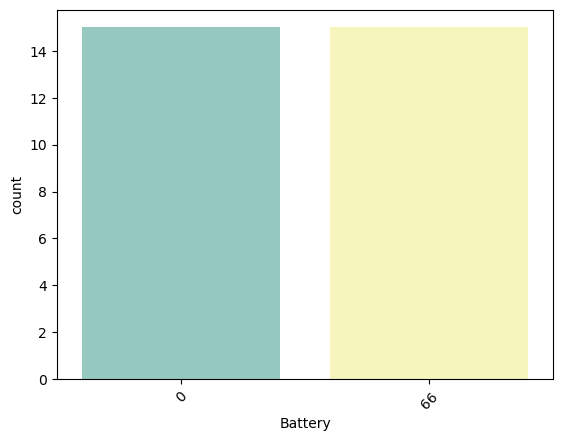

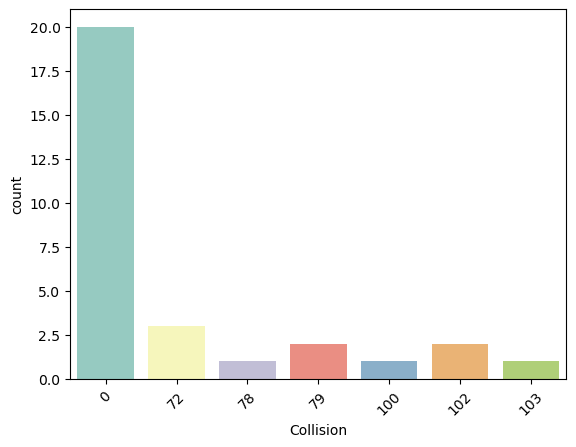

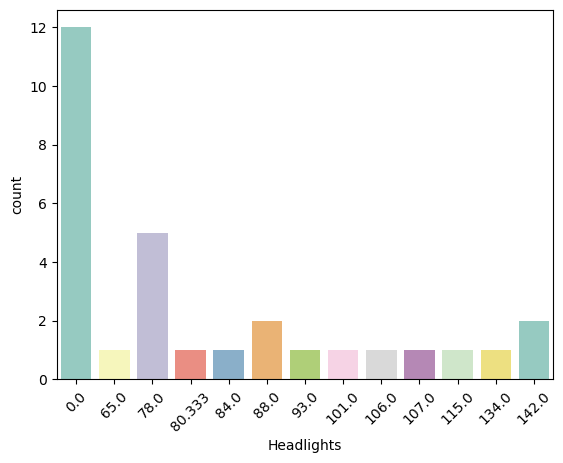

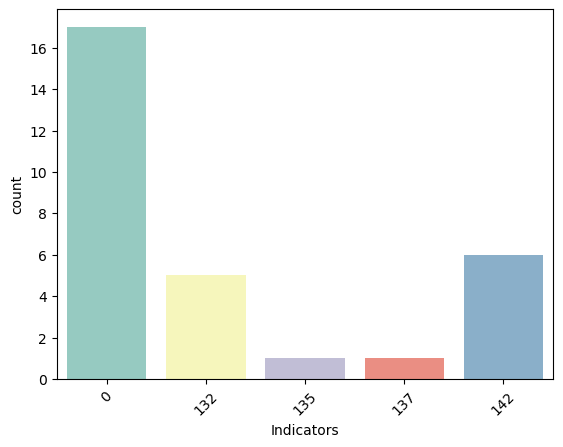

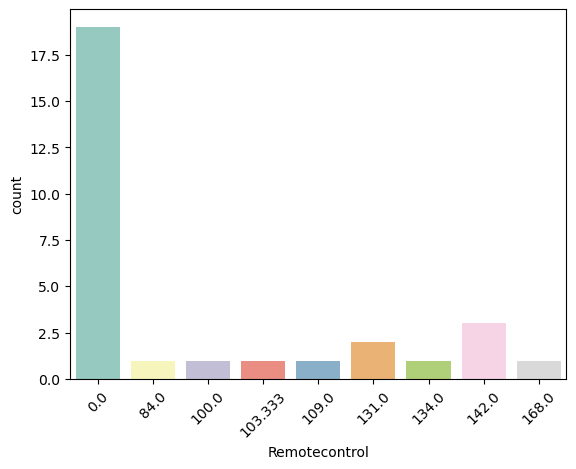

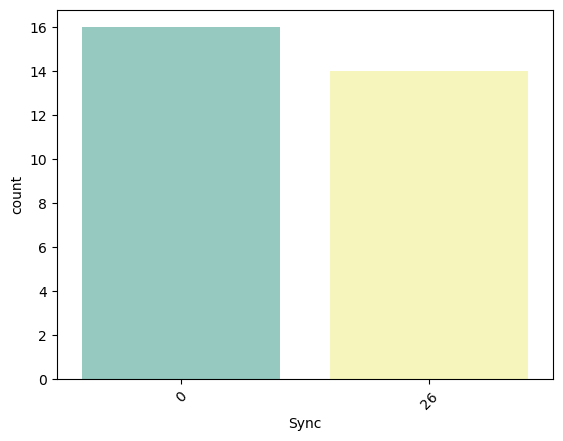

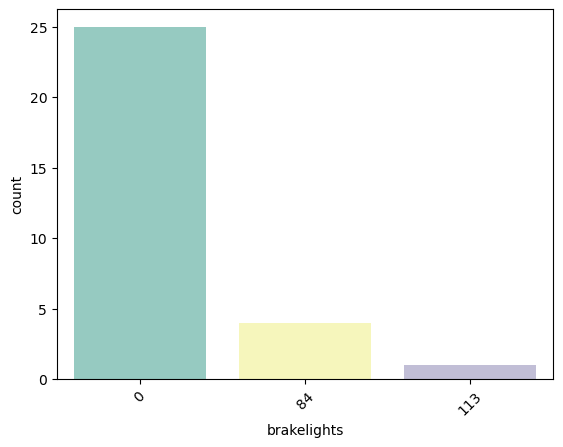

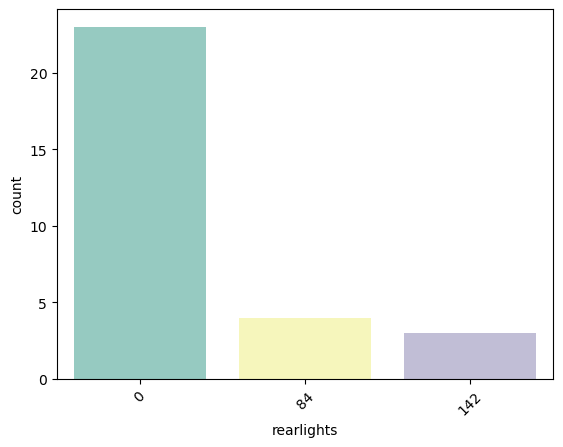

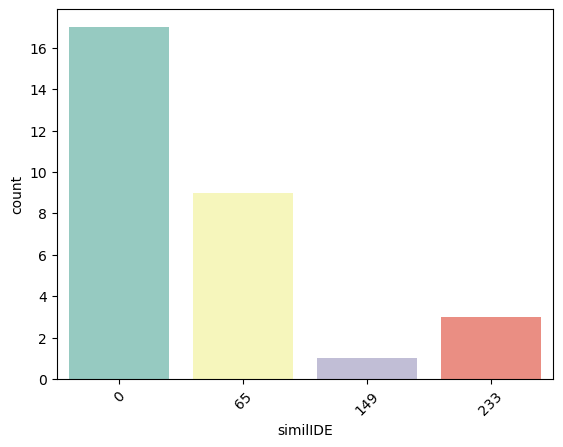

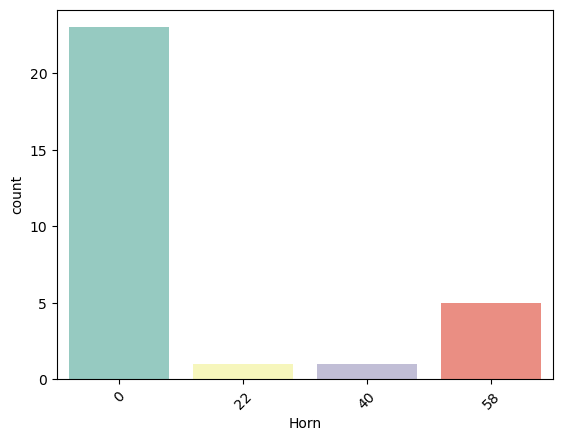

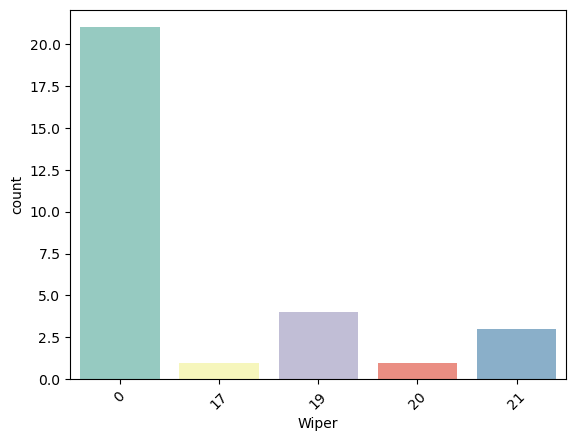

In [7]:
# Looping through all the features by our y variable - see if there is relationship
# Packages / libraries

import seaborn as sns
features = ['Battery', 'Collision', 'Headlights', 'Indicators', 'Remotecontrol',
       'Sync', 'brakelights', 'rearlights', 'similIDE', 'Horn', 'Wiper']

for f in features:
    sns.countplot(x = f, data = DataDF, palette = 'Set3')# hue = 'Good Loan')
    plt.xticks(rotation=45)
    plt.show()

In [8]:
# scaling features using min max scaler 

scaler = MinMaxScaler()

scaler.fit(DataDF[['Battery']])
DataDF['Battery'] = scaler.transform(DataDF[['Battery']])

scaler.fit(DataDF[['Collision']])
DataDF['Collision'] = scaler.transform(DataDF[['Collision']])

scaler.fit(DataDF[['Headlights']])
DataDF['Headlights'] = scaler.transform(DataDF[['Headlights']])

scaler.fit(DataDF[['Indicators']])
DataDF['Indicators'] = scaler.transform(DataDF[['Indicators']])

scaler.fit(DataDF[['Remotecontrol']])
DataDF['Remotecontrol'] = scaler.transform(DataDF[['Remotecontrol']])


scaler.fit(DataDF[['Sync']])
DataDF['Sync'] = scaler.transform(DataDF[['Sync']])

scaler.fit(DataDF[['rearlights']])
DataDF['rearlights'] = scaler.transform(DataDF[['rearlights']])
scaler.fit(DataDF[['similIDE']])
DataDF['similIDE'] = scaler.transform(DataDF[['similIDE']])
scaler.fit(DataDF[['Horn']])
DataDF['Horn'] = scaler.transform(DataDF[['Horn']])

scaler.fit(DataDF[['brakelights']])
DataDF['brakelights'] = scaler.transform(DataDF[['brakelights']])

scaler.fit(DataDF[['Wiper']])
DataDF['Wiper'] = scaler.transform(DataDF[['Wiper']])


In [9]:
# How to find the best number if Ks?

# Running K means with multible Ks

no_of_clusters = range(2,15) #[2,3,4,5,6,7,8,9]
inertia = []


for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(DataDF[['Battery','Collision','Headlights','Indicators','Remotecontrol','Sync','brakelights','rearlights','similIDE','Horn','Wiper']])
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

The innertia for : 2 Clusters is: 42.823747057742466
The innertia for : 3 Clusters is: 35.3640394759187
The innertia for : 4 Clusters is: 31.24807353992569
The innertia for : 5 Clusters is: 27.221407396218154
The innertia for : 6 Clusters is: 24.6327233814296
The innertia for : 7 Clusters is: 21.872553025967964
The innertia for : 8 Clusters is: 18.341336880292907
The innertia for : 9 Clusters is: 17.16223535838469
The innertia for : 10 Clusters is: 15.234633838417693
The innertia for : 11 Clusters is: 14.109272516915919
The innertia for : 12 Clusters is: 13.075793672040156
The innertia for : 13 Clusters is: 11.133286960576392
The innertia for : 14 Clusters is: 10.536613688812714


Text(0.5, 1.0, 'Inertia Plot per k')

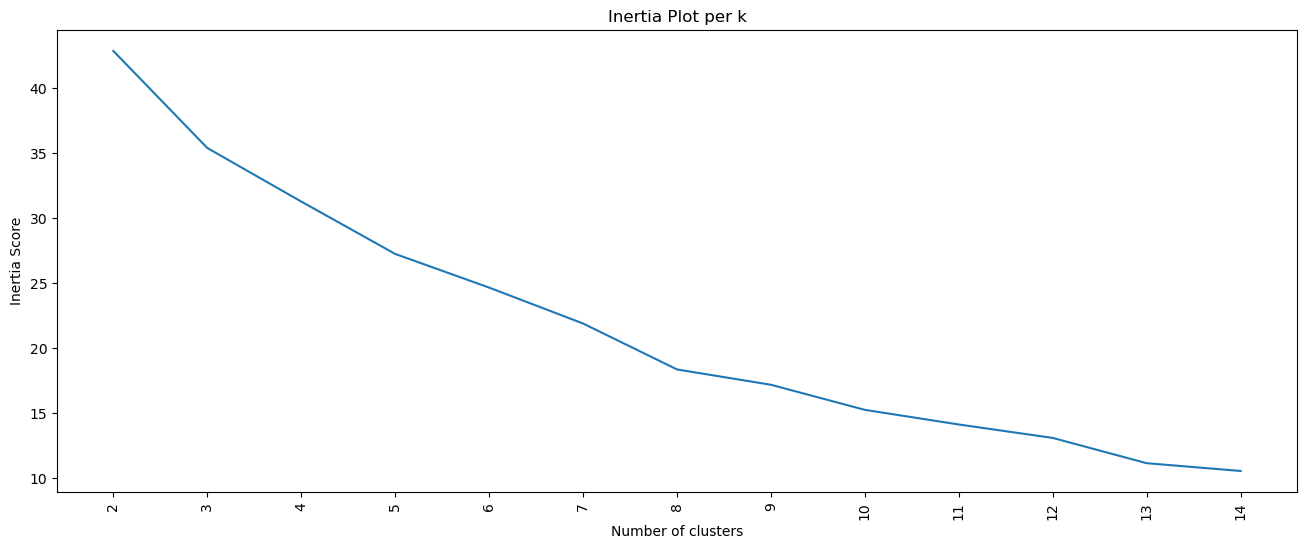

In [10]:
# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

In [11]:
# Running K means on 5 clusters  random_state=2

from sklearn.cluster import KMeans, k_means

kmeans = KMeans(n_clusters=5)
kmeans = kmeans.fit(DataDF[['Battery','Collision','Headlights','Indicators','Remotecontrol','Sync','brakelights','rearlights','similIDE','Horn','Wiper']])


kmeans.labels_

# "predictions" for new data
#TestDF = pd.read_excel('E:/MS/Thesis/data set/testing.xlsx')
predictions = kmeans.predict(DataDF[['Battery','Collision','Headlights','Indicators','Remotecontrol','Sync','brakelights','rearlights','similIDE','Horn','Wiper']])


# calculating the Counts of the cluster
unique, counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,5)

# Creating a datagrame
countscldf = pd.DataFrame(counts, columns = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3","Cluster 4"])

# display
countscldf

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,8,6,4,9,3


In [12]:
kmeans.labels_

array([1, 0, 1, 1, 2, 3, 4, 0, 2, 2, 3, 2, 3, 3, 3, 3, 1, 1, 4, 3, 0, 0,
       3, 0, 0, 0, 0, 4, 3, 1])

In [14]:
#dataframe with label

DataDF['labels']= kmeans.labels_
DataDF.head()

,Battery,Collision,Headlights,Indicators,Remotecontrol,Sync,brakelights,rearlights,similIDE,Horn,Wiper,Document,labels
0,1.0,0.766990,0.565725,0.964789,0.615077,1.0,0.743363,0.591549,0.639485,0.0,0.000000,URS1,1
1,1.0,0.990291,0.000000,0.000000,0.779762,0.0,0.000000,0.000000,0.000000,1.0,0.000000,URS2,0
2,1.0,0.699029,0.549296,1.000000,0.000000,1.0,0.000000,0.000000,0.278970,1.0,0.000000,URS3,1
3,1.0,0.757282,0.549296,1.000000,0.000000,1.0,0.000000,0.000000,0.278970,0.0,0.000000,URS4,1
4,0.0,0.000000,0.619718,0.929577,0.845238,0.0,0.743363,0.591549,1.000000,0.0,0.904762,URS5,2


In [16]:
# testing with testing 

TestDF = pd.read_excel('E:/MS/Thesis/data set/testing.xlsx')

test_predictions = kmeans.predict(TestDF[['Battery','Collision','Headlights','Indicators','Remotecontrol','Sync','brakelights','rearlights','similIDE','Horn','Wiper']])

#TestDF['labels']= kmeans.labels_

test_predictions

array([1])